## Análise Qualitativa dos casos Covid em MG

In [2]:
#IMPORTINGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
import html
import re
from datetime import datetime
from io import StringIO

In [3]:
#LEITURA DO ARQUIVO CSV

file = 'xlsx_sistemas_18112020.csv'
df = pd.read_csv(file,delimiter=';',encoding='iso-8859-1',dtype='unicode')
print(str(len(df)) + ' registros importados!')

205063 registros importados!


In [4]:
df = df.fillna('NAO INFORMADO')
df.head()

,ID,URS,MICRO,MACRO,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA,CODIGO,EVOLUCAO,DATA_EVOLUCAO,INTERNACAO,UTI,RACA,COMORBIDADE,DATA_ATUALIZACAO,ORIGEM_DA_INFORMACAO
0,1,TEOFILO OTONI,TEOFILO OTONI/MALACACHETA,NORDESTE,14/06/2020,CASO CONFIRMADO,MASCULINO,51,50 A 59 ANOS,TEOFILO OTONI,316860,EM ACOMPANHAMENTO,09/06/2020,SIM,NAO,NAO INFORMADO,NAO INFORMADO,18/11/2020,SIVEP
1,2,BELO HORIZONTE,BELO HORIZONTE/NOVA LIMA/CAETE,CENTRO,24/06/2020,CASO CONFIRMADO,MASCULINO,37,30 A 39 ANOS,BELO HORIZONTE,310620,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,18/11/2020,SIVEP
2,3,SAO JOAO DEL REI,SAO JOAO DEL REI,CENTRO SUL,21/06/2020,CASO CONFIRMADO,MASCULINO,77,70 A 79 ANOS,LAGOA DOURADA,313740,EM ACOMPANHAMENTO,NAO INFORMADO,SIM,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,18/11/2020,SIVEP
3,4,SAO JOAO DEL REI,SAO JOAO DEL REI,CENTRO SUL,21/06/2020,CASO CONFIRMADO,MASCULINO,60,60 A 69 ANOS,CORONEL XAVIER CHAVES,311970,EM ACOMPANHAMENTO,NAO INFORMADO,SIM,NAO INFORMADO,NAO INFORMADO,SIM,18/11/2020,SIVEP
4,5,ITUIUTABA,ITUIUTABA,TRIANGULO DO NORTE,20/05/2020,CASO CONFIRMADO,FEMININO,39,30 A 39 ANOS,ITUIUTABA,313420,RECUPERADO,21/05/2020,SIM,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP


## Distribuição das idades - casos e óbitos

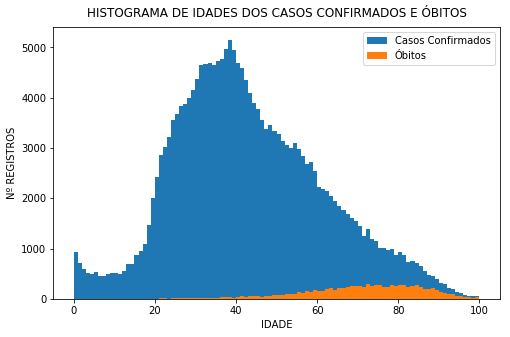

In [23]:
#IDADE CASOS
df_idade_geral = df[df.IDADE.ne('NAO INFORMADO')]['IDADE']
df_idade_geral = df_idade_geral.astype(float)

#IDADE OBITOS
df_ob = df[df.EVOLUCAO.eq('OBITO')]
df_idade_ob = df_ob[df_ob.IDADE.ne('NAO INFORMADO')]['IDADE']
df_idade_ob = df_idade_ob.astype(float)

#Plotting
fig, ax = plt.subplots(figsize=(8,5))
plt.hist(df_idade_geral, bins=100, range=(0,100), label='Casos Confirmados')
plt.hist(df_idade_ob, bins = 100, range=(0,100), label='Óbitos')
plt.title('HISTOGRAMA DE IDADES DOS CASOS CONFIRMADOS E ÓBITOS',loc='center', pad=10)
plt.xlabel('IDADE')
plt.ylabel('Nº REGISTROS')
ax.legend()
plt.show()

## Distribuição por sexo - casos e óbitos

In [85]:
sexo = list(df[df.SEXO.ne('NAO INFORMADO')]['SEXO'].value_counts())
print(sexo)
sexo_ob = list(df_ob['SEXO'].value_counts())
print(sexo_ob)

#plt.bar(sexo.keys(),sexo.values(),color=['fuchsia','blue','gray'])
#plt.title('QNTD GERAL POR SEXO',loc='center', pad=10)


[102999, 101528]
[5434, 4171]


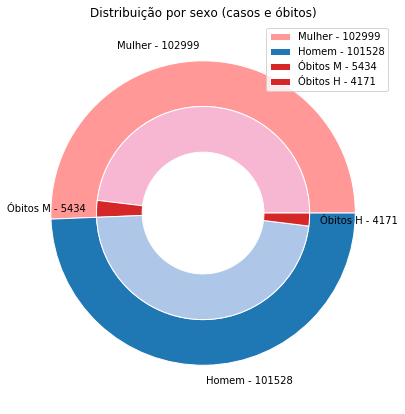

In [156]:
fig, ax = plt.subplots(figsize=(10,7))
size = 0.3

sexo = list(df[df.SEXO.ne('NAO INFORMADO')]['SEXO'].value_counts())
sexo_ob = list(df_ob['SEXO'].value_counts())

vals = np.array([[sexo[0], sexo_ob[0]], [sexo[1], sexo_ob[1]]])

cmap = plt.get_cmap("tab20")
outer_colors = cmap(np.array([7, 0]))
inner_colors = cmap(np.array([13, 6, 1, 6]))

#print(vals.sum(axis=1))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels=['Mulher - ' + str(sexo[0]),'Homem - ' + str(sexo[1])],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, labels=['','Óbitos M - ' + str(sexo_ob[0]), '', 'Óbitos H - ' + str(sexo_ob[1])],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Distribuição por sexo (casos e óbitos)')

ax.legend(loc='upper right')
plt.show()

## Quem tinha comorbidade e não foi internado (insuficiência de leitos/estrutura?)

In [24]:
# LISTA DE CASOS COM COMORBIDADE

#Com comorbidade
df_com_comorbidade = df[df.COMORBIDADE.eq('SIM')]
gp_com_comorbidade = df_com_comorbidade.groupby(['COMORBIDADE','INTERNACAO','UTI'])['ID'].agg('count')
gp_com_comorbidade

#Sem comorbidade
df_sem_comorbidade = df[df.COMORBIDADE.eq('NAO')]
gp_sem_comorbidade = df_sem_comorbidade.groupby(['COMORBIDADE','INTERNACAO','UTI'])['ID'].agg('count')
gp_sem_comorbidade

COMORBIDADE  INTERNACAO     UTI          
NAO          NAO            NAO              6153
                            NAO INFORMADO      47
             NAO INFORMADO  NAO                 2
                            NAO INFORMADO     212
             SIM            NAO              7699
                            NAO INFORMADO    1317
                            SIM              2908
Name: ID, dtype: int64

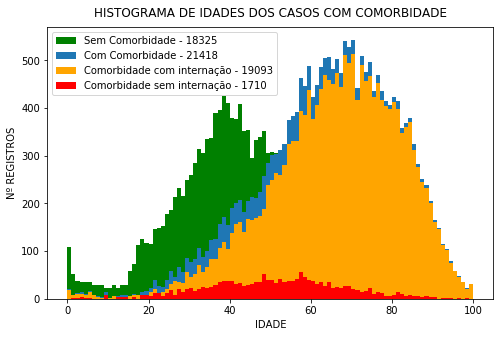

In [26]:
# Idade dos casos sem comorbidade
df_idade_sem_comorbidade = df_sem_comorbidade[df_sem_comorbidade.IDADE.ne('NAO INFORMADO')]['IDADE']
df_idade_sem_comorbidade = df_idade_sem_comorbidade.astype(float)

# Idade dos casos com comorbidade
df_idade_com_comorbidade = df_com_comorbidade[df_com_comorbidade.IDADE.ne('NAO INFORMADO')]['IDADE']
df_idade_com_comorbidade = df_idade_com_comorbidade.astype(float)

#Idade dos casos com comorbidade que foram internados
df_com_comorbidade_internados = df_com_comorbidade[df_com_comorbidade.INTERNACAO.eq('SIM')]
df_idade_com_comorbidade_internados = df_com_comorbidade_internados[df_com_comorbidade_internados.IDADE.ne('NAO INFORMADO')]['IDADE']
df_idade_com_comorbidade_internados = df_idade_com_comorbidade_internados.astype(float)


#Idade dos casos com comorbidade que não foram internados
df_com_comorbidade_nao_internados = df_com_comorbidade[df_com_comorbidade.INTERNACAO.eq('NAO')]
df_idade_com_comorbidade_nao_internados = df_com_comorbidade_nao_internados[df_com_comorbidade_nao_internados.IDADE.ne('NAO INFORMADO')]['IDADE']
df_idade_com_comorbidade_nao_internados = df_idade_com_comorbidade_nao_internados.astype(float)

# Plotting
fig, ax = plt.subplots(figsize=(8,5))
plt.hist(df_idade_sem_comorbidade, bins=100, range=(0,100), lw=2, label='Sem Comorbidade - '+str(len(df_idade_sem_comorbidade)), zorder=0, color='green')
plt.hist(df_idade_com_comorbidade, bins=100, range=(0,100), lw=2, label='Com Comorbidade - '+str(len(df_idade_com_comorbidade)), zorder=0)
plt.hist(df_idade_com_comorbidade_internados, bins=100, range=(0,100), lw=2, label='Comorbidade com internação - '+str(len(df_idade_com_comorbidade_internados)), zorder=2, color='orange')
plt.hist(df_idade_com_comorbidade_nao_internados, bins=100, range=(0,100), lw=2, label='Comorbidade sem internação - '+str(len(df_idade_com_comorbidade_nao_internados)), zorder=3, color='red')

plt.title('HISTOGRAMA DE IDADES DOS CASOS COM COMORBIDADE',loc='center', pad=10)
plt.xlabel('IDADE')
plt.ylabel('Nº REGISTROS')
ax.legend()
plt.show()

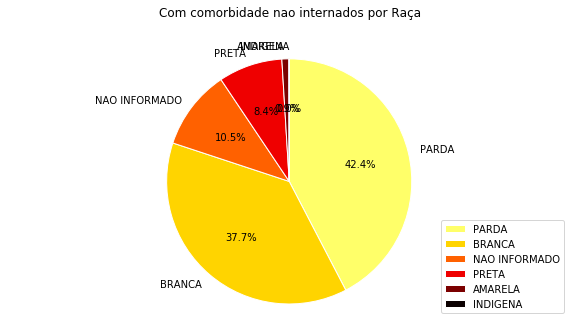

In [159]:
#Raça dos casos com comorbidade não internados
raca = dict(df_com_comorbidade_internados['RACA'].value_counts())
raca = dict(sorted(raca.items(), key=lambda kv: kv[1], reverse=True))

#print(plt.cm.cmap_d.keys())
cmap = plt.cm.hot_r
colors = cmap(np.linspace(0.15, 1., len(raca)))

fig1, ax1 = plt.subplots(figsize=(10,5))
pie_wedge_collection = ax1.pie(x=list(raca.values()), labels=list(raca.keys()), colors=colors, autopct='%1.1f%%', startangle=90, radius=1, counterclock=False)
for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')
plt.title('Com comorbidade nao internados por Raça',loc='center', pad=30)
ax1.axis('equal')
ax1.legend(loc='lower right')
#plt.tight_layout()
plt.show()

In [204]:
df_com_comorbidade_nao_internados

,ID,URS,MICRO,MACRO,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA,CODIGO,EVOLUCAO,DATA_EVOLUCAO,INTERNACAO,UTI,RACA,COMORBIDADE,DATA_ATUALIZACAO,ORIGEM_DA_INFORMACAO
5,6,CORONEL FABRICIANO,IPATINGA,VALE DO ACO,13/06/2020,CASO CONFIRMADO,FEMININO,35,30 A 39 ANOS,JOANESIA,313610,EM ACOMPANHAMENTO,NAO INFORMADO,NAO,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP
94,95,MONTES CLAROS,TAIOBEIRAS,NORTE,24/06/2020,CASO CONFIRMADO,MASCULINO,58,50 A 59 ANOS,TAIOBEIRAS,316800,EM ACOMPANHAMENTO,NAO INFORMADO,NAO,NAO INFORMADO,NAO INFORMADO,SIM,18/11/2020,SIVEP
131,132,JUIZ DE FORA,JUIZ DE FORA,SUDESTE,24/06/2020,CASO CONFIRMADO,MASCULINO,83,80 A 89 ANOS,JUIZ DE FORA,313670,EM ACOMPANHAMENTO,NAO INFORMADO,NAO,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP
190,191,JUIZ DE FORA,JUIZ DE FORA,SUDESTE,19/06/2020,CASO CONFIRMADO,MASCULINO,93,90 OU MAIS,JUIZ DE FORA,313670,EM ACOMPANHAMENTO,NAO INFORMADO,NAO,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP
235,236,POUSO ALEGRE,ITAJUBA,SUL,22/06/2020,CASO CONFIRMADO,FEMININO,82,80 A 89 ANOS,PARAISOPOLIS,314730,RECUPERADO,22/06/2020,NAO,NAO,BRANCA,SIM,18/11/2020,SIVEP
272,273,JUIZ DE FORA,JUIZ DE FORA,SUDESTE,24/06/2020,CASO CONFIRMADO,MASCULINO,50,50 A 59 ANOS,JUIZ DE FORA,313670,EM ACOMPANHAMENTO,NAO INFORMADO,NAO,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP
545,546,JUIZ DE FORA,JUIZ DE FORA,SUDESTE,03/06/2020,CASO CONFIRMADO,FEMININO,65,60 A 69 ANOS,JUIZ DE FORA,313670,RECUPERADO,18/06/2020,NAO,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP
1008,1009,DIVINOPOLIS,PARA DE MINAS,OESTE,09/06/2020,CASO CONFIRMADO,MASCULINO,57,50 A 59 ANOS,PARA DE MINAS,314710,RECUPERADO,23/05/2020,NAO,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP
1015,1016,VARGINHA,SAO LOURENCO,SUL,30/05/2020,CASO CONFIRMADO,FEMININO,65,60 A 69 ANOS,CRUZILIA,312080,RECUPERADO,29/05/2020,NAO,NAO,NAO INFORMADO,SIM,18/11/2020,SIVEP
1141,1142,GOVERNADOR VALADARES,GOVERNADOR VALADARES,LESTE,26/05/2020,CASO CONFIRMADO,FEMININO,76,70 A 79 ANOS,GOVERNADOR VALADARES,312770,RECUPERADO,27/05/2020,NAO,NAO,PARDA,SIM,18/11/2020,SIVEP


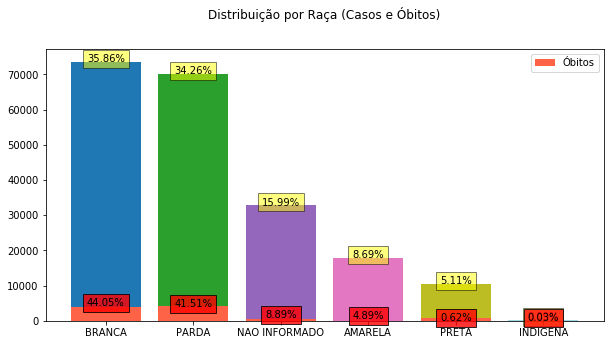

In [265]:
#Raça dos casos com comorbidade não internados
raca = dict(df['RACA'].value_counts())
raca_ob = dict(df[df.EVOLUCAO.eq('OBITO')]['RACA'].value_counts())
#raca = dict(sorted(raca.items(), key=lambda kv: kv[1], reverse=True))

#print(plt.cm.cmap_d.keys())
cmap = plt.cm.tab20
colors = cmap(np.linspace(0, 1, len(raca)))

fig1, ax1 = plt.subplots(figsize=(10,5))
plt.bar(raca.keys(), raca.values(), color=colors)
plt.bar(raca_ob.keys(), raca_ob.values(), color='tomato', label='Óbitos')
plt.title('Distribuição por Raça (Casos e Óbitos)',loc='center', pad=30)
for index, value in enumerate(raca.values()):
    plt.text(index, value, str("{0:.2f}%".format(value/sum(raca.values())*100)), horizontalalignment='center', bbox=dict(facecolor='yellow', alpha=0.5))
for index, value in enumerate(raca_ob.values()):
    plt.text(index, value, str("{0:.2f}%".format(value/sum(raca_ob.values())*100)), horizontalalignment='center', bbox=dict(facecolor='red', alpha=0.8))    

ax1.legend()
plt.show()